# 16. OPTICAL CHARACTER RECOGNITION via NEURAL NETWORKS

The task for this exercise is to develop a Neural Netweok model that can classify human written digits into either of the first 10.

## EX 1 . 1 Loading The MNIST Digits Dataset

### 1. 1 Importing The Libraries

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
from matplotlib import pyplot as plt

### 1.2 Importing the Dataset MNIST

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
X[1].shape

(784,)

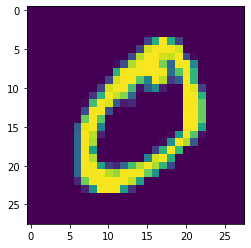

In [5]:
#data example 1, number 0
plt.imshow(X[1].reshape((28,28)))
plt.show()

In [6]:
y[1]

'0'

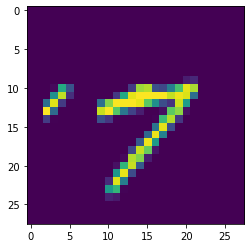

In [7]:
#data example 2 , number 7
plt.imshow(X[1023].reshape((28,28)))
plt.show()

In [8]:
y[1023]

'7'

## EX 1. 2 Cross Fold Validation

### 2.1 Importing The Necessary Libraries

In [9]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.neural_network import MLPClassifier

### 2.2  k. Fold CV

In [10]:
kfold = KFold(n_splits=5)
kfold.get_n_splits(X)

5

In [11]:
i = 0
for train_index, test_index in kfold.split(X):
    i=i+1
    X_train, X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    print(f'{i}th Fold')
    print('TRAIN SET INDEX',train_index)
    print('TEST SET INDEX',test_index)

1th Fold
TRAIN SET INDEX [14000 14001 14002 ... 69997 69998 69999]
TEST SET INDEX [    0     1     2 ... 13997 13998 13999]
2th Fold
TRAIN SET INDEX [    0     1     2 ... 69997 69998 69999]
TEST SET INDEX [14000 14001 14002 ... 27997 27998 27999]
3th Fold
TRAIN SET INDEX [    0     1     2 ... 69997 69998 69999]
TEST SET INDEX [28000 28001 28002 ... 41997 41998 41999]
4th Fold
TRAIN SET INDEX [    0     1     2 ... 69997 69998 69999]
TEST SET INDEX [42000 42001 42002 ... 55997 55998 55999]
5th Fold
TRAIN SET INDEX [    0     1     2 ... 55997 55998 55999]
TEST SET INDEX [56000 56001 56002 ... 69997 69998 69999]


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


## EX 1. 3. Hyperparameter Grid

#### 3.1 Finding the Hyperparameters

MLP reqires tuning a number of hyperparameters such as:

-number of hidden neurons

-layers

-iterations

#### 3.2 Defining the Hyperparameters

In [13]:
number_of_hidden_neurons =[20,40]
layers=[1,4]
iterations = [8,12]

####  3.3 Creating Hyperparameter Grid

In [14]:
hyp_grid = []
for i in range(0,2):
    for j in range(0,2):
        for k in range(0,2):
            hyp_grid.append((number_of_hidden_neurons[i],layers[j],iterations[k]))
    

In [60]:
#(neurons, layers,iterations)
hyp_grid

[(20, 1, 8),
 (20, 1, 12),
 (20, 4, 8),
 (20, 4, 12),
 (40, 1, 8),
 (40, 1, 12),
 (40, 4, 8),
 (40, 4, 12)]

#### 3.4 Defining a Function for Creating Hiddden Layer Size

In [16]:
#grid is tuple (a,b,c)
def create_hl_size(grid):
    return (grid[0],)*grid[1]   

## EX 1. 4 Random Search Procedure

Now, we will tested every hyperparameter combinations in hyp_grid set, and we would eveluate accuracy score for each hyperparameter by using 5-fold Cross Validation.

In [23]:
list_of_train_scores = []
list_of_test_scores = []

for grid in hyp_grid:
    list_of_train_scores_k_fold = []
    list_of_test_scores_k_fold=[]

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index],X[test_index]
        y_train,y_test = y[train_index], y[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=create_hl_size(grid),max_iter=grid[2],)
        mlp.fit(X_train, y_train)
    
        train_score =mlp.score(X_train, y_train)
        test_score =mlp.score(X_test, y_test)
    
        list_of_train_scores_k_fold.append(train_score)
        list_of_test_scores_k_fold.append(test_score)
    
    list_of_train_scores.append(sum(list_of_train_scores_k_fold)/5)
    list_of_test_scores.append(sum(list_of_test_scores_k_fold)/5)
    
    print(f'{i}th grid score calculated')
    


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neur

1th grid score calculated


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\

1th grid score calculated


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neur

1th grid score calculated


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\

1th grid score calculated


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neur

1th grid score calculated


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\

1th grid score calculated


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neur

1th grid score calculated


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\

1th grid score calculated


In [35]:
print('All Train Scores By 5 Folds:\n',list_of_train_scores,'\n')
print('All Test Scores By 5 Folds:\n',list_of_test_scores) 

All Train Scores By 5 Folds:
 [0.7096142857142858, 0.8129857142857142, 0.9012, 0.9033749999999999, 0.9112035714285713, 0.9337464285714286, 0.957167857142857, 0.9641392857142856] 

All Test Scores By 5 Folds:
 [0.7053142857142858, 0.8079428571428572, 0.8920285714285715, 0.8928571428571429, 0.8979142857142858, 0.919442857142857, 0.9397, 0.9443142857142858]


## EX 1. 4  Reporting Test Accuracy

### 4.1 Plotting Accuracy Scores

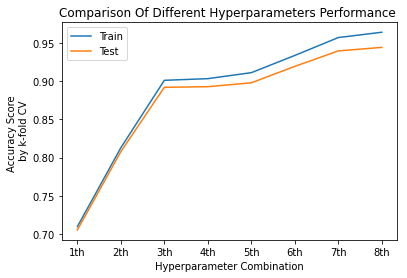

In [56]:
plt.title('Comparison Of Different Hyperparameters Performance ')
plt.plot(['1th','2th','3th','4th','5th','6th','7th','8th'],list_of_train_scores,label='Train')
plt.plot(['1th','2th','3th','4th','5th','6th','7th','8th'],list_of_test_scores,label='Test')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy Score \n by k-fold CV')
plt.legend()
plt.show()


### 4.2 The Best Hyperparameter Combination

According to the our calculation, it can be said that 8th hyperparameter combination has the best accuracy score.

In [55]:
print('The Best Hyperparameter Combination is :\n',hyp_grid[7],'\n')
print('The Highest Train Accuracy score is\n', list_of_train_scores[7],'\n')
print('The Highest Test Accuracy score is\n', list_of_test_scores[7],'\n')

The Best Hyperparameter Combination is :
 (40, 4, 12) 

The Highest Train Accuracy score is
 0.9641392857142856 

The Highest Test Accuracy score is
 0.9443142857142858 



In conclusion, 4 layers, 40 neurons and 12 iteration has the best performance on our data set.